# Deepseek-R1-Llama3 8B Distill - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer
from src.eval.pulse_score import PULSEScoreCalculator

In [3]:
model_id = "deepseekr1llama8b"
base_output_dir = (
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark"
)
model_output_dir = os.path.join(base_output_dir, "llms", model_id)
results_output_dir = os.path.join(base_output_dir, r"results_output")


prompt_approaches = os.listdir(model_output_dir)
print(prompt_approaches)

# Try to load results_dict from json before calculating
results_loaded = False
results_output_jsons = os.path.join(results_output_dir, "jsons")
results_json_path = f"{model_id}_results.json"

if not results_loaded:
    best_prompt_approach = None

    results_dict = {}

    for prompt_approach in prompt_approaches:

        if not os.path.isdir(os.path.join(model_output_dir, prompt_approach)):
            continue

        print("=" * 50)

        print(f"\nPrompting Approach {prompt_approach}")

        cat_files = LLMAnalyzer.categorize_files(
            [os.path.join(model_output_dir, prompt_approach)],
            verbose=False,
        )

        df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"], verbose=True)

        # Filter for final prediction step if agent is used

        if "Step Name" in df_mdata.columns:

            df_mdata = df_mdata[
                df_mdata["Step Name"] == "final_prediction"
            ].reset_index(drop=True)

        ps = PULSEScoreCalculator()

        pulse_score = ps.calculate_pulse_score_from_raw_data(
            df=df_mdata,
        )
        pulse_score["model_id"] = model_id
        pulse_score["prompting_id"] = prompt_approach

        pulse_score_temp = pulse_score["overall"]["overall_score"]

        results_dict[prompt_approach] = pulse_score

        if best_prompt_approach is None or pulse_score_temp > best_prompt_approach[1]:

            best_prompt_approach = (prompt_approach, pulse_score_temp)

    print(
        f"\nBest prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
    )

    # Save results as json. Uses pulse-result format
    json_output_path = os.path.join(results_output_jsons, f"{model_id}_results.json")
    LLMAnalyzer.save_results_dict_as_json(
        results_dict, model_output_dir, json_output_path
    )

['liu_2023_few_shot_preprocessor', 'sarvari_2024_aggregation_preprocessor', 'zhu_2024a_cot_preprocessor', 'zhu_2024b_one_shot_preprocessor', 'zhu_2024b_zero_shot', 'zhu_2024c_categorization_summary_agent_preprocessor']

Prompting Approach liu_2023_few_shot_preprocessor
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: eicu, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: hirid, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: miiv, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: eicu, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: hirid, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: miiv, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: sepsis, Dataset: eicu, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, Task: sepsis, Dataset: hirid, Timestamp: 20250626_123125
Model Name: DeepseekR1Llama8b, 

## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:865: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


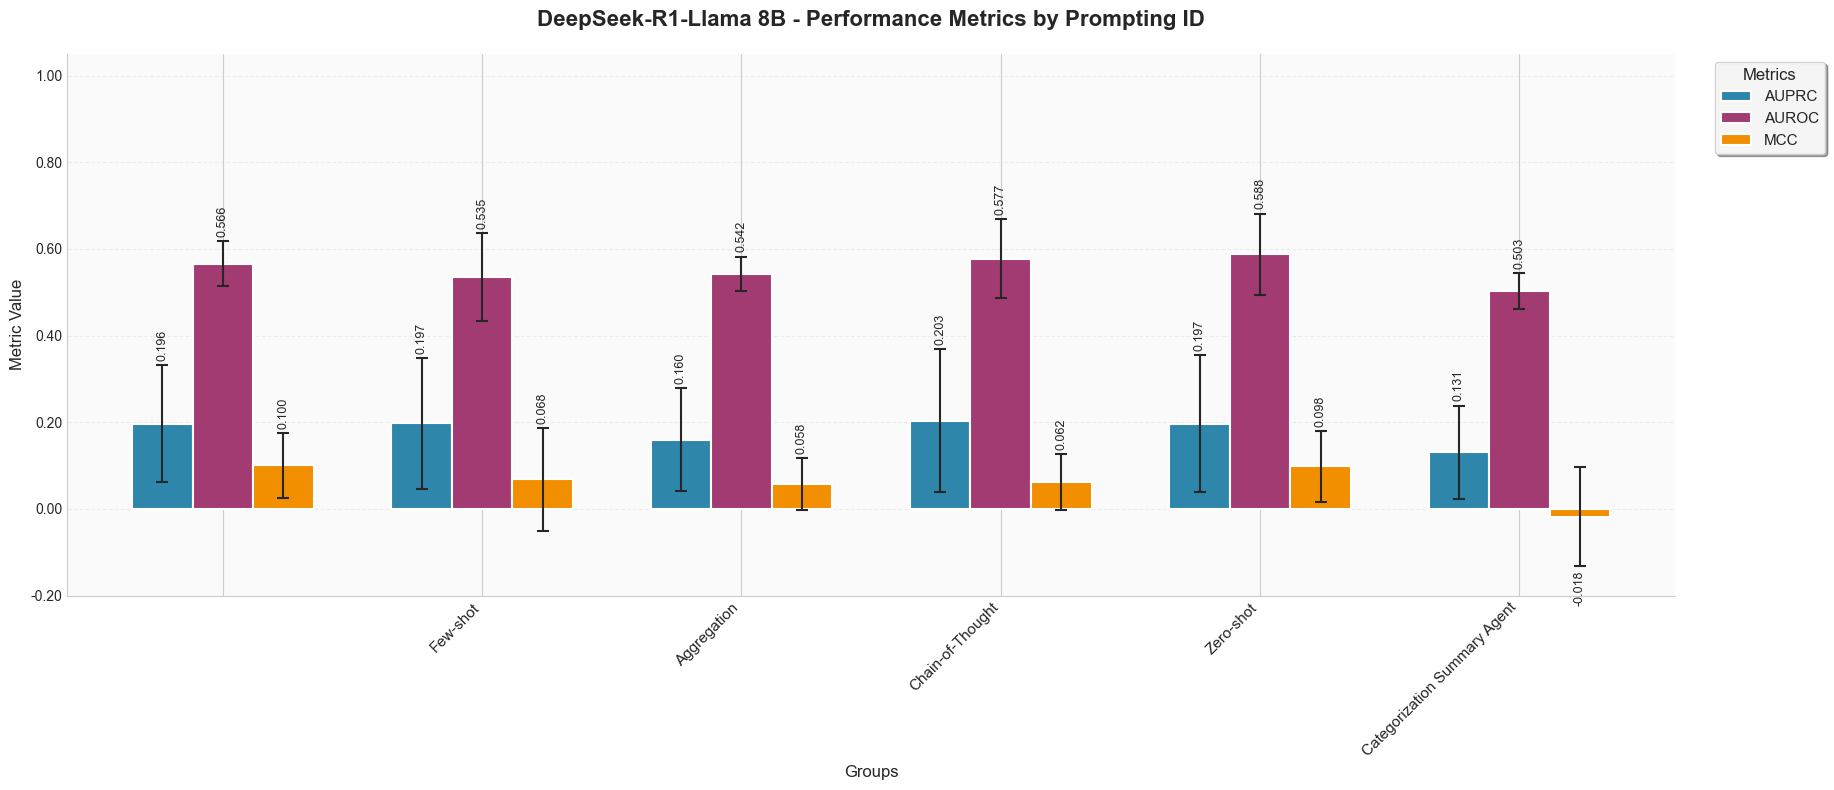

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="DeepSeek-R1-Llama 8B - ",
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:865: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


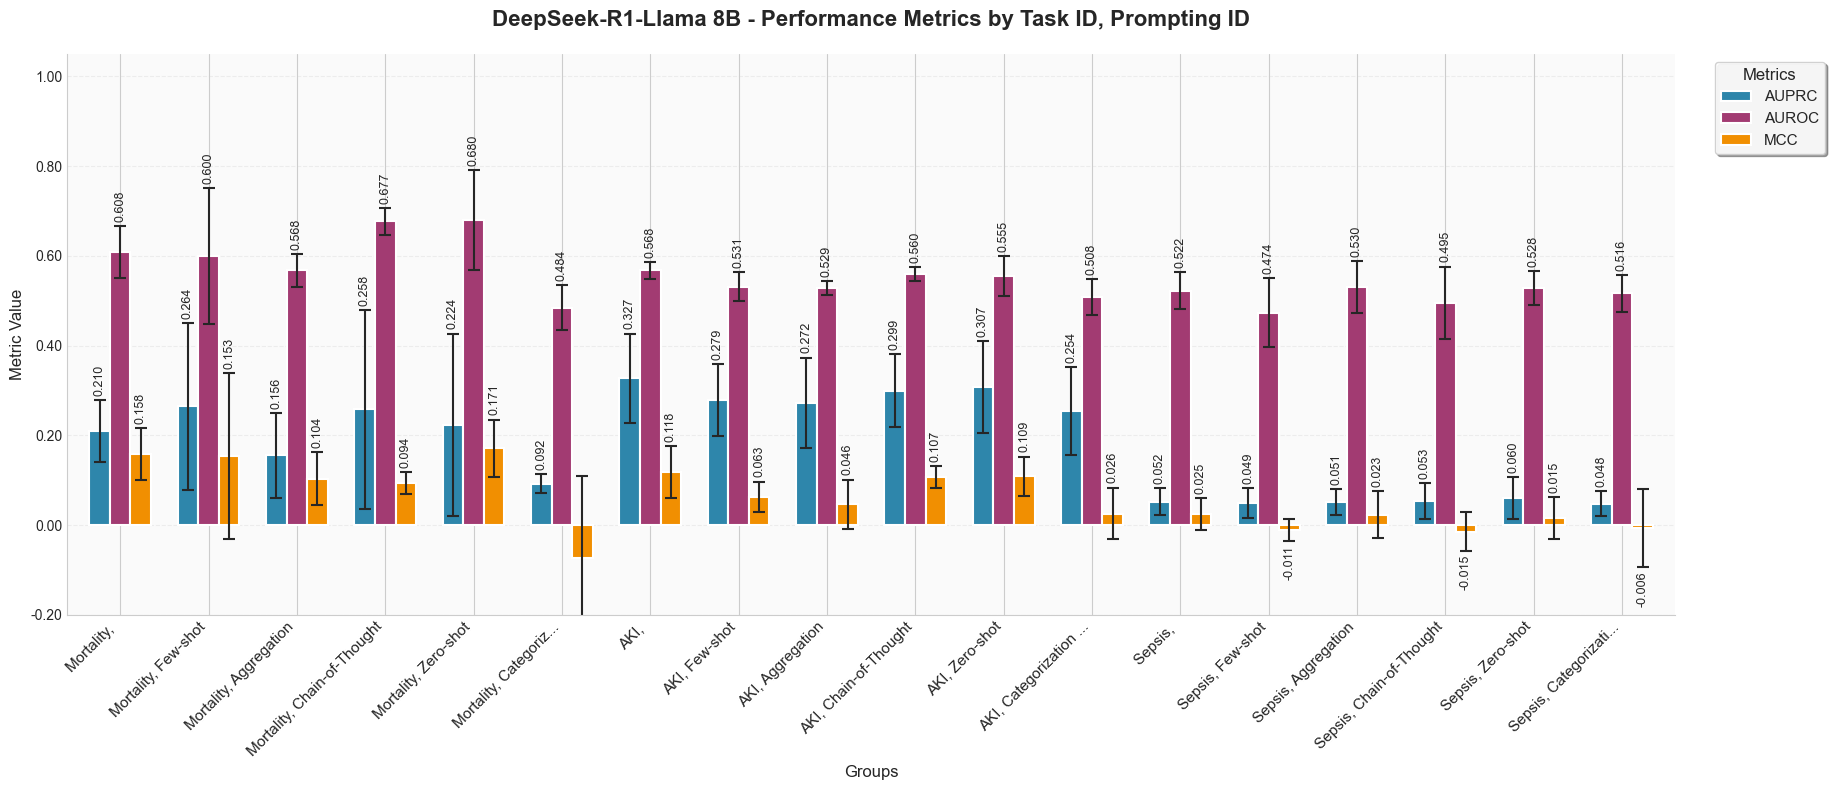

In [6]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="DeepSeek-R1-Llama 8B - ",
)

In [7]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [8]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=best_prompt_approach[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', index=4, options=('liu_2023_few_shot_preprocessor', 'sarvari_2024_agg…

In [9]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\deepseekr1llama8b\zhu_2024b_zero_shot
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: eicu, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: miiv, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: eicu, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: miiv, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: sepsis, Dataset: eicu, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: sepsis, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: sepsis, Dataset: miiv, Timestamp: 20250620_211315


In [10]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,22.15s,21800.44s,3293,3240489,741,729416,305,679,984,0.45
1,aki,hirid,22.82s,22411.05s,3293,3234095,774,759798,159,823,982,0.19
2,aki,miiv,22.44s,22079.14s,3293,3240503,755,743046,229,755,984,0.30
3,mortality,eicu,45.36s,4536.22s,7884,788438,1295,129544,7,93,100,0.08
4,mortality,hirid,48.29s,4828.94s,7888,788801,1380,138034,11,89,100,0.12
5,mortality,miiv,51.64s,5163.59s,7885,788471,1472,147175,12,88,100,0.14
6,sepsis,eicu,41.65s,40816.07s,3331,3264751,1385,1357289,47,933,980,0.05
7,sepsis,hirid,40.70s,39439.68s,3332,3228228,1368,1325567,73,896,969,0.08
8,sepsis,miiv,40.76s,40355.29s,3331,3297864,1341,1327922,25,965,990,0.03


In [11]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,run_id,prompting_id,metrics_summary
0,DeepseekR1Llama8b,mortality,eicu,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.747, 'auprc': 0.126, '..."
1,DeepseekR1Llama8b,mortality,hirid,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.552, 'auprc': 0.089, '..."
2,DeepseekR1Llama8b,mortality,miiv,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.741, 'auprc': 0.457, '..."
3,DeepseekR1Llama8b,aki,eicu,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.584, 'auprc': 0.401, '..."
4,DeepseekR1Llama8b,aki,hirid,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.504, 'auprc': 0.198, '..."
5,DeepseekR1Llama8b,aki,miiv,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.577, 'auprc': 0.322, '..."
6,DeepseekR1Llama8b,sepsis,eicu,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.514, 'auprc': 0.045, '..."
7,DeepseekR1Llama8b,sepsis,hirid,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.5710000000000001, 'aup..."
8,DeepseekR1Llama8b,sepsis,miiv,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.5, 'auprc': 0.023, 'no..."


In [12]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='eicu', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='hirid', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='miiv', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='eicu', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='hirid', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='miiv', run_id='20250620_211315'
Updating exist